## House sales in King County

### Introduction

This example illustrates **linear regression** in Python, using the package **scikit-learn** (there are other ways). I develop a model for house sale prices in King County (Washington), which includes Seattle. It is the most populous county in Washington (population 1,931,249 in the 2010 census), and the 13th-most populous in the United States. 

The data set include 21,613 homes sold between May 2014 and May 2015. It contains 15 house features plus the price and the id columns:

* `id`, an identifier.

* `date`, the date when the sale took place.

* `price`, the sale price.

* `bedrooms`, the number of bedrooms.

* `bathrooms`, the number of bathrooms

* `sqft_living`, the square footage of the home.

* `sqft_above`, the square footage of the home, discounting the basement.

* `sqft_basement`, the square footage of the basement.

* `sqft_lot`, the square footage of the lot.

* `floors`, the total floors (levels) in house.

* `waterfront`, a dummy for having a view to the waterfront.

* `condition`, a 1-5 rating.

* `yr_built`, the year when the house was built.

* `yr_renovated`, the year when the house was renovated.

* `zipcode`, the ZIP code of the house.

* `lat`, the latitude of the house.

* `long`, the longitude of the house.

### Importing the data

I import the data from a csv file, checking the dimensions.


In [1]:
import pandas as pd
king = pd.read_csv('https://raw.githubusercontent.com/mcanela-iese/' +
    'DataSci_Course/master/Data/king.csv')
king.shape

(21613, 17)

Actually, `king` is a data frame, with 21,613 rows and 17 columns. The first column has many **duplicates**, which are not duplicates for the data frame. This means that the same house may have been sold more than once during the period covered by the data.

In [2]:
king['id'].duplicated().sum()

177

In [3]:
king.duplicated().sum()

0

With the method `info`, we take a look at the columns of this data frame.

In [4]:
king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
id               21613 non-null int64
date             21613 non-null object
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
condition        21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
price            21613 non-null float64
dtypes: float64(5), int64(11), object(1)
memory usage: 2.8+ MB


Note the format of `date`. '20140502T000000' must be read as '2014-05-02 00:00:00'. This is the **datetime format**. The 'T' indicates the beginning of the time part. Since '20140502T000000' contains a non-numeric character, it is imported as a string.

A summary of the data helps. I use the method `describe`, omitting `id`, `zipcode` and `date`, which would not make sense. Note that, for a dummy like `waterfront`, the mean is just the proportion of 1's. So, 0.75% of the houses have a view to the waterfront. The rest is easy.


In [5]:
print(king.iloc[:, 3:18].describe().round(1))

           lat     long  bedrooms  bathrooms  sqft_living  sqft_above  \
count  21613.0  21613.0   21613.0    21613.0      21613.0     21613.0   
mean      47.6   -122.2       3.4        2.1       2079.9      1788.4   
std        0.1      0.1       0.9        0.8        918.4       828.1   
min       47.2   -122.5       0.0        0.0        290.0       290.0   
25%       47.5   -122.3       3.0        1.8       1427.0      1190.0   
50%       47.6   -122.2       3.0        2.2       1910.0      1560.0   
75%       47.7   -122.1       4.0        2.5       2550.0      2210.0   
max       47.8   -121.3      33.0        8.0      13540.0      9410.0   

       sqft_basement   sqft_lot   floors  waterfront  condition  yr_built  \
count        21613.0    21613.0  21613.0     21613.0    21613.0   21613.0   
mean           291.5    15107.0      1.5         0.0        3.4    1971.0   
std            442.6    41420.5      0.5         0.1        0.7      29.4   
min              0.0      520.0   

### Linear regression model

scikit.learn contains a collection of **machine learning** methods, both supervised and unsupervised. There are alternative ways to develop linear regression models with Python, but I use the scikit-learn approach for consistency with other notebooks. 

To apply a supervised learning method in scikit-learn, we have to specify the **dependent variable** `y` and the matrix of **independent variables** `X`, whose columns have to be numeric (`y` can contain string data in classification methods). 

In [6]:
y = king['price']
X = king[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
  'waterfront', 'condition', 'sqft_above', 'yr_built', 'yr_renovated',
  'lat', 'long']]

scikit-learn (`sklearn` in the code) contains the module `linear_model`, with various regression methods. I load only the method `LinearRegression`, which I name `LR`, to make it shorter.

In [7]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

For `LR`, the method `fit` fits a linear equation to the data. The method `score` quantifies the quality of the predictions, which in `LR` is done with an **R-squared statistic**.

In [8]:
LR.fit(X, y)
LR.score(X, y).round(3)

0.646

The **predicted values** are obtained in `scikit-learn` with the method `predict`. I calculate the prediction errors, or **residuals**, directly.

In [9]:
pred_price = LR.predict(X)
pred_error = king['price'] - pred_price

### Graphics

Although the price has a (very) **skewed distribution**, that of the prediction error is reasonably symmetric, as shown in the exhibit below. I use `matplotlib.pyplot` methods for plotting, as usual. The line `%matplotlib inline` is used to get graphics in Jupyter notebooks.

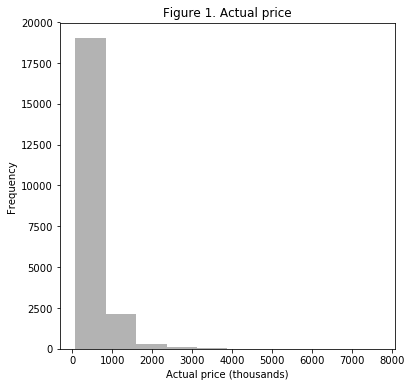

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.hist(king['price']/1000, color='0.7')
plt.title('Figure 1. Actual price')
plt.xlabel('Actual price (thousands)')
plt.ylabel('Frequency')

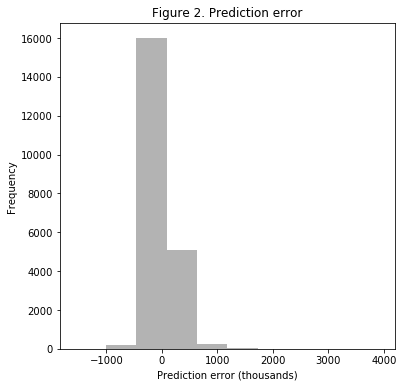

In [11]:
plt.figure(figsize=(6,6))
plt.hist(pred_error/1000, color='0.7')
plt.title('Figure 2. Prediction error')
plt.xlabel('Prediction error (thousands)')
plt.ylabel('Frequency')

Scatter plots with the predicted values in the horizontal axis and either the actual values or the prediction errors in the vertical axis are useful to detect problems in the models fitted. I leave the discussion of this plot for the homework.

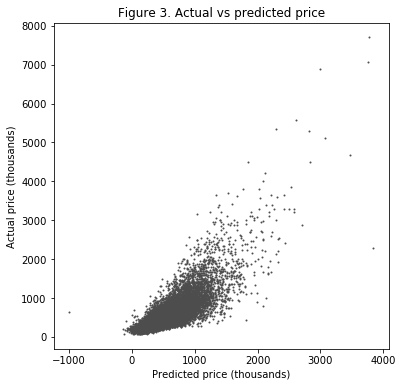

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(pred_price/1000, king['price']/1000, color='0.3', s=1)
plt.title('Figure 3. Actual vs predicted price')
plt.xlabel('Predicted price (thousands)')
plt.ylabel('Actual price (thousands)')